Identifying Key Financial Stress Points in Indian Households: A Data-Driven Approach to Improve Savings & Budgeting

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import random
from faker import Faker

In [37]:
data = pd.read_csv(r"C:\Rich or Poor\data\data.csv")
df = pd.DataFrame(data)
df.head(5)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [3]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [38]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [39]:
df['Age'].isnull().sum()

0

Data is preprocessed

#Feature engineering

In [40]:
df['Total_Expenses'] = df[['Rent', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']].sum(axis=1) 
df['Total_Expenses']
df['Monthly_Savings'] = df['Income'] - df['Total_Expenses']
df['Monthly_Savings']
df['Savings_Rate'] = (df['Monthly_Savings'] / df['Income']) * 100 
df['Savings_Rate']
df['Debt_to_Income_Ratio'] = (df['Loan_Repayment'] / df['Income']) * 100
df['Debt_to_Income_Ratio']


0         0.000000
1         0.000000
2         9.156884
3         6.711745
4        12.512860
           ...    
19995    18.829631
19996     0.000000
19997    19.922913
19998    10.448662
19999    13.653887
Name: Debt_to_Income_Ratio, Length: 20000, dtype: float64

In [17]:
print(df[['Income', 'Total_Expenses', 'Monthly_Savings', 'Loan_Repayment']].describe())

             Income  Total_Expenses  Monthly_Savings  Loan_Repayment
count  2.000000e+04    20000.000000     20000.000000    20000.000000
mean   4.158550e+04    27433.299795     14152.196309     2049.800292
std    4.001454e+04    26640.156529     14248.323500     4281.789941
min    1.301187e+03      889.006360       260.958973        0.000000
25%    1.760488e+04    11456.673303      5764.699915        0.000000
50%    3.018538e+04    19805.024446     10013.866787        0.000000
75%    5.176545e+04    33988.897040     17413.339305     2627.142320
max    1.079728e+06   663933.222101    415795.151417   123080.682009


In [41]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Total_Expenses', 'Monthly_Savings',
       'Savings_Rate', 'Debt_to_Income_Ratio'],
      dtype='object')

## Visualization

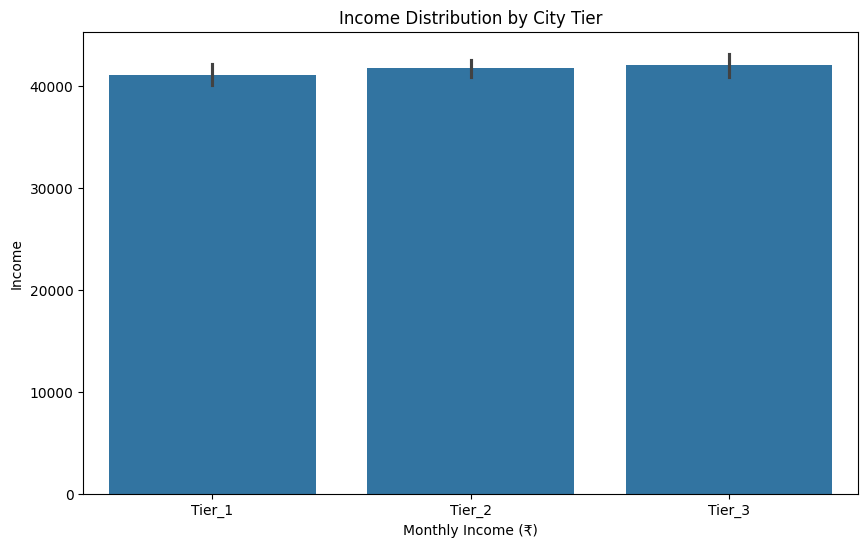

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='City_Tier', y='Income', estimator='mean')  # Explicit mean
plt.title('Income Distribution by City Tier')
plt.xlabel('Monthly Income (₹)')
plt.show()

In [69]:
print(df.groupby('City_Tier')['Income'].mean())  # Are averages different?

City_Tier
Tier_1    41068.390063
Tier_2    41713.210706
Tier_3    42031.388210
Name: Income, dtype: float64


In [70]:
print(df.groupby('City_Tier')['Income'].mean())  # Are averages different?

City_Tier
Tier_1    41068.390063
Tier_2    41713.210706
Tier_3    42031.388210
Name: Income, dtype: float64


C:\Users\rudra\AppData\Local\Temp\ipykernel_47876\667170862.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


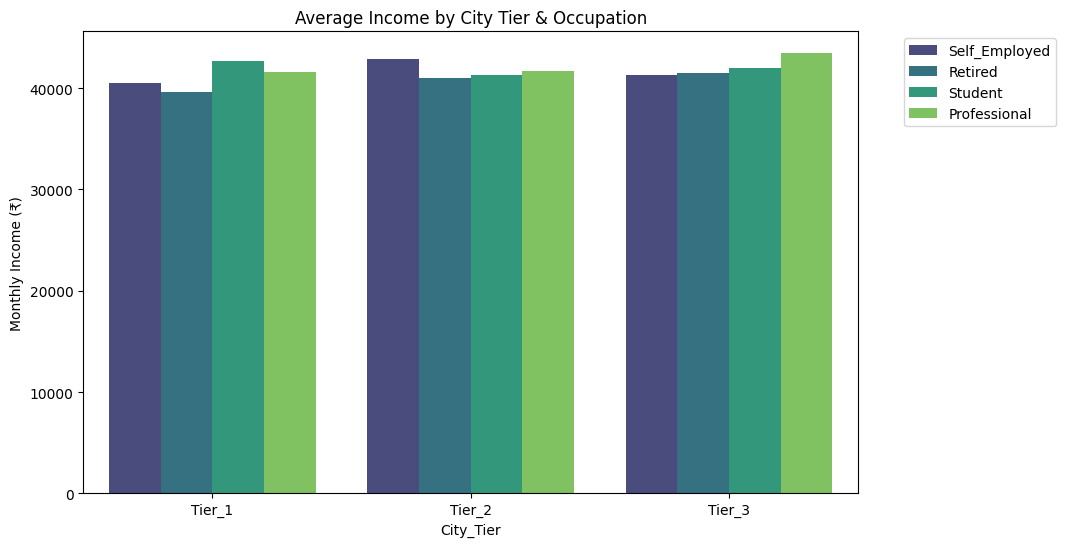

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df, 
    x='City_Tier', 
    y='Income',
    hue='Occupation',  # Compare across occupations
    ci=None,          # Remove error bars
    palette='viridis'
)
plt.title('Average Income by City Tier & Occupation')
plt.ylabel('Monthly Income (₹)')
plt.legend(bbox_to_anchor=(1.05, 1))  # Move legend outside
plt.show()

C:\Users\rudra\AppData\Local\Temp\ipykernel_47876\2073642100.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


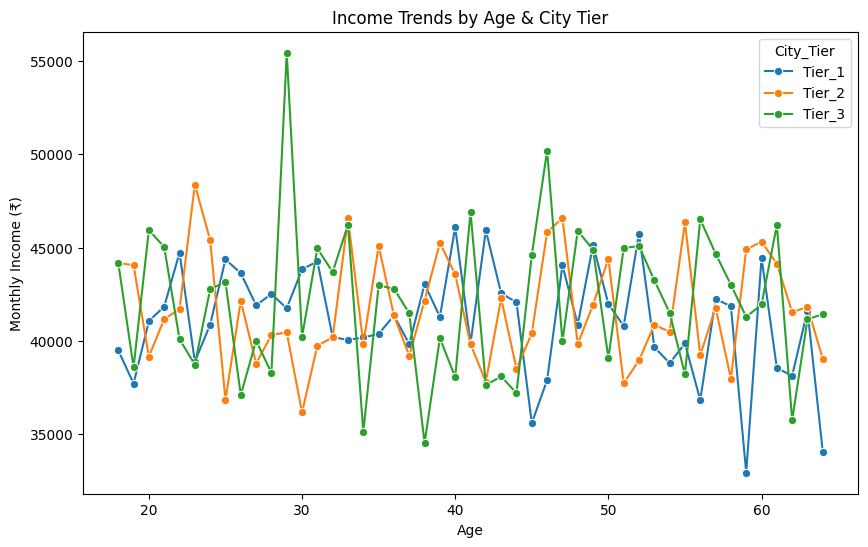

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df, 
    x='Age', 
    y='Income',
    hue='City_Tier',
    marker='o',  # Add markers
    ci=None      # Remove confidence band
)
plt.title('Income Trends by Age & City Tier')
plt.ylabel('Monthly Income (₹)')
plt.show()

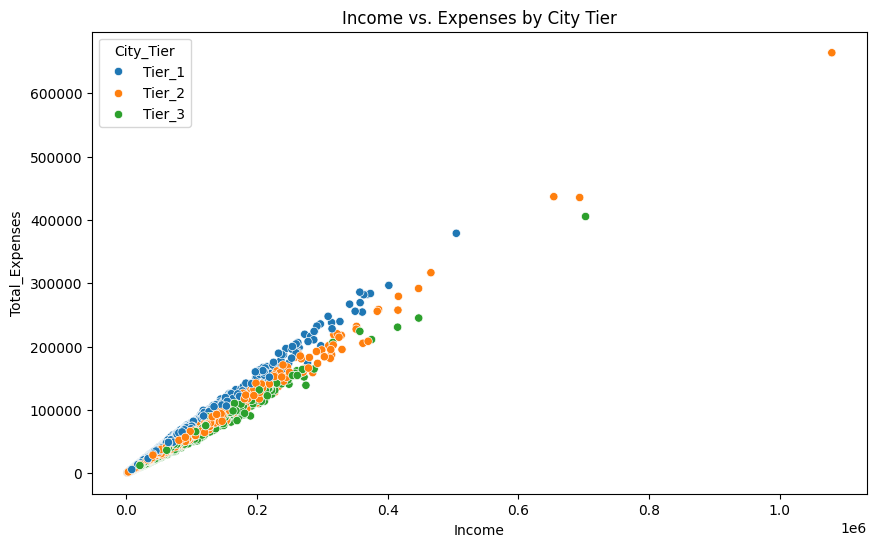

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Income', 
    y='Total_Expenses',
    hue='City_Tier'
)
plt.title('Income vs. Expenses by City Tier')
plt.show()